In [ ]:
print("Mounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted.")

# Set the dataset path
dataset_path = '/content/drive/MyDrive/country211'


Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted.


In [ ]:
print("Verifying directory structure...")
import os

# List the contents of the dataset directory
print("Contents of dataset directory:", os.listdir(dataset_path))

# List the contents of the train, val, and test directories
print("Contents of train directory:", os.listdir(f'{dataset_path}/train')[:10])  # Print only the first 10 classes
print("Contents of val directory:", os.listdir(f'{dataset_path}/valid')[:10])
print("Contents of test directory:", os.listdir(f'{dataset_path}/test')[:10])

# Check for a few subdirectories and their contents
print("Contents of a sample train subdirectory:", os.listdir(f'{dataset_path}/train/AD')[:5])
print("Contents of a sample val subdirectory:", os.listdir(f'{dataset_path}/valid/AD')[:5])
print("Contents of a sample test subdirectory:", os.listdir(f'{dataset_path}/test/AD')[:5])
print("Directory structure verification completed.")


Verifying directory structure...
Contents of dataset directory: ['train', 'test', 'valid']
Contents of train directory: ['VI', 'VN', 'YE', 'WS', 'XK', 'VU', 'ZM', 'ZA', 'ZW', 'UA']
Contents of val directory: ['VN', 'YE', 'ZW', 'ZA', 'WS', 'VG', 'VI', 'ZM', 'VU', 'XK']
Contents of test directory: ['WS', 'VN', 'YE', 'VU', 'XK', 'ZW', 'ZA', 'ZM', 'UY', 'UA']
Contents of a sample train subdirectory: ['6388234_42.692802_1.550522.jpg', '1339606_42.508172_1.529846.jpg', '8781186_42.549792_1.522979.jpg', '7814353_42.620191_1.571216.jpg', '7649543_42.464847_1.490986.jpg']
Contents of a sample val subdirectory: ['4796207_42.592774_1.502552.jpg', '7069863_42.566404_1.597738.jpg', '5191885_42.50644_1.527657.jpg', '5424208_42.500184_1.509236.jpg', '4662508_42.508133_1.527743.jpg']
Contents of a sample test subdirectory: ['8926690_42.483808_1.457576.jpg', '4374976_42.507464_1.522619.jpg', '9297637_42.438292_1.475569.jpg', '7366964_42.635072_1.446311.jpg', '8682972_42.506891_1.522325.jpg']
Directory 

In [ ]:
# Data Loading and Preprocessing
# Import necessary libraries
print("Importing necessary libraries...")
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for the training, validation, and test sets
print("Defining transformations...")
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the datasets with ImageFolder
print("Loading training dataset...")
train_dataset = datasets.ImageFolder(root=f'{dataset_path}/train', transform=train_transforms)
print("Training dataset loaded.")

print("Loading validation dataset...")
val_dataset = datasets.ImageFolder(root=f'{dataset_path}/valid', transform=val_transforms)
print("Validation dataset loaded.")

print("Loading test dataset...")
test_dataset = datasets.ImageFolder(root=f'{dataset_path}/test', transform=val_transforms)
print("Test dataset loaded.")

# Define the DataLoaders
print("Defining DataLoaders...")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
print("DataLoaders defined.")

# Print dataset sizes
print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')


Importing necessary libraries...
Defining transformations...
Loading training dataset...
Training dataset loaded.
Loading validation dataset...
Validation dataset loaded.
Loading test dataset...
Test dataset loaded.
Defining DataLoaders...
DataLoaders defined.
Training dataset size: 31671
Validation dataset size: 10550
Test dataset size: 21120


Displaying sample images from different classes...
Loading and displaying images from the training set...


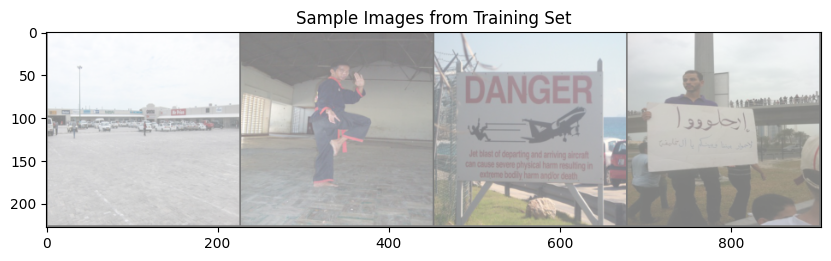

Loading and displaying images from the validation set...


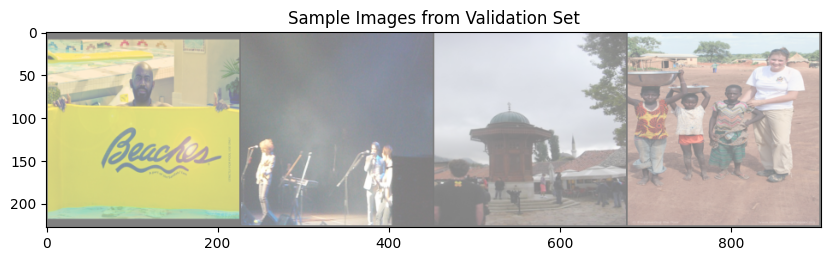

Loading and displaying images from the test set...


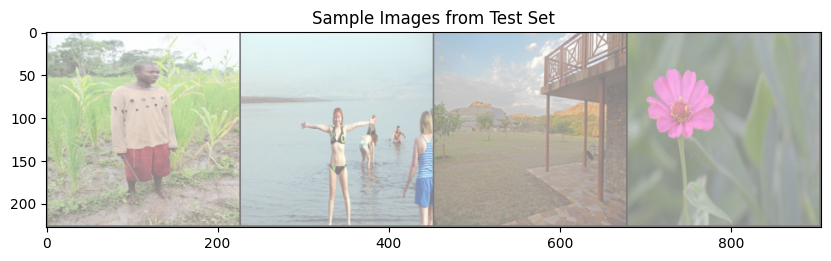

Sample images displayed successfully.


In [ ]:
print("Displaying sample images from different classes...")
import random
from torchvision.utils import make_grid
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def show_images(images, labels, title):
    images = images / 2 + 0.5  # unnormalize
    npimg = images.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Load a few sample images from different classes
def load_random_images(dataset_path, classes, num_images=4, img_size=(224, 224)):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
    ])
    images, labels = [], []
    for class_name in random.sample(classes, num_images):
        class_dir = os.path.join(dataset_path, class_name)
        image_name = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path).convert('RGB')
        image = transform(image)
        images.append(image)
        labels.append(class_name)
    return images, labels

# Show random images from training set
print("Loading and displaying images from the training set...")
train_classes = os.listdir(f'{dataset_path}/train')
images, labels = load_random_images(f'{dataset_path}/train', train_classes)
show_images(make_grid(images), labels, 'Sample Images from Training Set')

# Show random images from validation set
print("Loading and displaying images from the validation set...")
val_classes = os.listdir(f'{dataset_path}/valid')
images, labels = load_random_images(f'{dataset_path}/valid', val_classes)
show_images(make_grid(images), labels, 'Sample Images from Validation Set')

# Show random images from test set
print("Loading and displaying images from the test set...")
test_classes = os.listdir(f'{dataset_path}/test')
images, labels = load_random_images(f'{dataset_path}/test', test_classes)
show_images(make_grid(images), labels, 'Sample Images from Test Set')

print("Sample images displayed successfully.")


Analyzing image dimensions and aspect ratios...
Getting image dimensions from the training set...
Plotting image dimensions...


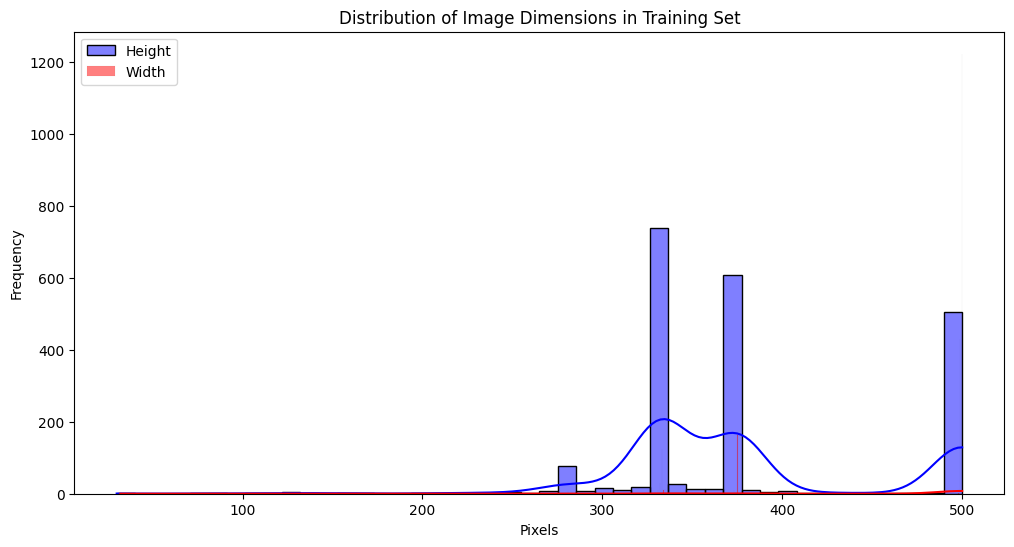

Image dimensions analysis completed.


In [ ]:
import seaborn as sns

print("Analyzing image dimensions and aspect ratios...")
# Function to get image dimensions
def get_image_dimensions(dataset_path, classes, num_images=10):
    dimensions = []
    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)
        for image_name in random.sample(os.listdir(class_dir), num_images):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)
            dimensions.append(image.size)  # Only take width and height
    return dimensions

# Get dimensions from training set
print("Getting image dimensions from the training set...")
train_dimensions = get_image_dimensions(f'{dataset_path}/train', train_classes)

# Plot image dimensions
print("Plotting image dimensions...")
train_widths, train_heights = zip(*train_dimensions)
plt.figure(figsize=(12, 6))
sns.histplot(train_heights, kde=True, color='blue', label='Height')
sns.histplot(train_widths, kde=True, color='red', label='Width')
plt.title('Distribution of Image Dimensions in Training Set')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Image dimensions analysis completed.")


In [ ]:
print("Starting data loading and preprocessing...")
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define transformations for the training, validation, and test sets
print("Defining transformations for datasets...")
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the full datasets with ImageFolder
print("Loading datasets with ImageFolder...")
full_train_dataset = datasets.ImageFolder(root=f'{dataset_path}/train', transform=train_transforms)
full_val_dataset = datasets.ImageFolder(root=f'{dataset_path}/valid', transform=val_transforms)
full_test_dataset = datasets.ImageFolder(root=f'{dataset_path}/test', transform=test_transforms)

# Create DataLoader for each set
print("Creating DataLoader for datasets...")
train_loader = DataLoader(full_train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(full_val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(full_test_dataset, batch_size=32, shuffle=False)

print("Data loading and preprocessing completed.")


Starting data loading and preprocessing...
Defining transformations for datasets...
Loading datasets with ImageFolder...
Creating DataLoader for datasets...
Data loading and preprocessing completed.


In [ ]:
print("Defining ResNet model architecture...")
import torch.nn as nn
import torchvision.models as models

# Load a pre-trained ResNet model and modify the final layer
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        print("Loading pre-trained ResNet model...")
        self.resnet = models.resnet18(pretrained=True)  # You can choose different versions of ResNet, e.g., resnet50
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
        print("ResNet model loaded and modified.")

    def forward(self, x):
        return self.resnet(x)

# Initialize the model
num_classes = len(os.listdir(f'{dataset_path}/train'))
print(f"Number of classes: {num_classes}. Initializing model...")
model = ResNetModel(num_classes)
print("Model architecture defined successfully.")
print(model)


Defining ResNet model architecture...
Number of classes: 211. Initializing model...
Loading pre-trained ResNet model...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s]

ResNet model loaded and modified.
Model architecture defined successfully.
ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [ ]:
from tqdm import tqdm
import torch.optim as optim

print("Starting model training...")

# Define loss function and optimizer
print("Defining loss function and optimizer...")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

# Training loop with tqdm progress bar
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs} started...")
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader, 0), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")

    for i, (images, labels) in progress_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update the progress bar
        progress_bar.set_postfix(loss=running_loss/(i+1))

    print(f'Epoch [{epoch+1}/{num_epochs}] completed with loss: {running_loss/len(train_loader):.4f}')

print("Model training completed.")


Starting model training...
Defining loss function and optimizer...
Using device: cuda:0
Epoch 1/10 started...


Epoch 1/10: 100%|██████████| 990/990 [09:34<00:00,  1.72it/s, loss=5.44]


Epoch [1/10] completed with loss: 5.4359
Epoch 2/10 started...


Epoch 2/10: 100%|██████████| 990/990 [06:15<00:00,  2.64it/s, loss=5.32]


Epoch [2/10] completed with loss: 5.3197
Epoch 3/10 started...


Epoch 3/10: 100%|██████████| 990/990 [06:13<00:00,  2.65it/s, loss=5.27]


Epoch [3/10] completed with loss: 5.2675
Epoch 4/10 started...


Epoch 4/10: 100%|██████████| 990/990 [06:13<00:00,  2.65it/s, loss=5.24]


Epoch [4/10] completed with loss: 5.2371
Epoch 5/10 started...


Epoch 5/10: 100%|██████████| 990/990 [06:18<00:00,  2.61it/s, loss=5.21]


Epoch [5/10] completed with loss: 5.2076
Epoch 6/10 started...


Epoch 6/10: 100%|██████████| 990/990 [06:19<00:00,  2.61it/s, loss=5.18]


Epoch [6/10] completed with loss: 5.1791
Epoch 7/10 started...


Epoch 7/10: 100%|██████████| 990/990 [06:17<00:00,  2.62it/s, loss=5.16]


Epoch [7/10] completed with loss: 5.1605
Epoch 8/10 started...


Epoch 8/10: 100%|██████████| 990/990 [06:20<00:00,  2.60it/s, loss=5.14]


Epoch [8/10] completed with loss: 5.1396
Epoch 9/10 started...


Epoch 9/10: 100%|██████████| 990/990 [06:25<00:00,  2.57it/s, loss=5.11]


Epoch [9/10] completed with loss: 5.1117
Epoch 10/10 started...


Epoch 10/10: 100%|██████████| 990/990 [06:24<00:00,  2.58it/s, loss=5.08]

Epoch [10/10] completed with loss: 5.0844
Model training completed.


In [ ]:
from tqdm import tqdm

print("Starting model evaluation...")
model.eval()
correct = 0
total = 0

# Use tqdm to create a progress bar for the validation loader
with torch.no_grad():
    for i, (images, labels) in enumerate(tqdm(val_loader, desc="Evaluating", unit="batch")):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')


Starting model evaluation...


Evaluating: 100%|██████████| 330/330 [00:39<00:00,  8.29batch/s]

Validation Accuracy: 0.45%


In [ ]:
print("Saving the model...")
torch.save(model.state_dict(), 'resnet_model.pth')
print("Model saved as 'resnet_model.pth'.")


Saving the model...
Model saved as 'resnet_model.pth'.


In [ ]:
print("Loading the model from 'resnet_model.pth'...")
model = ResNetModel(num_classes)
model.load_state_dict(torch.load('resnet_model.pth'))
model.to(device)
print("Model loaded successfully.")


Loading the model from 'resnet_model.pth'...
Loading pre-trained ResNet model...
ResNet model loaded and modified.
Model loaded successfully.


In [ ]:
from tqdm import tqdm

print("Starting final model testing...")
model.eval()
correct = 0
total = 0

# Use tqdm to create a progress bar for the test loader
with torch.no_grad():
    for i, (images, labels) in enumerate(tqdm(test_loader, desc="Testing", unit="batch")):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Starting final model testing...


Testing: 100%|██████████| 660/660 [01:18<00:00,  8.40batch/s]

Test Accuracy: 0.48%
